# Лабораторная работа 233: Исследование направленных электромагнитных волн

In [1]:
from rich.console import Console
from rich.panel import Panel
from rich.text import Text
from rich.table import Table

import numpy as np
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

console = Console()

In [2]:
experiment: dict[str, dict[str, dict[float, float]]] =\
    {
  "tension_distribution": {
    "short_circuit": {
        17: 2,  # min
        18: 91,
        19: 170,
        20: 214,
        21: 241,
        22: 174,
        23: 1,  # min
        24: 92,
        25: 175,
        26: 218,
        29: 1,  # min
        34.8: 1  # min
    },
    "open": {
        30: 87,
        31: 83,  # min
        32: 95,
        33: 108,
        34: 114,
        35: 105,
        36: 87,
        37: 82,  # min
        38: 94
    }
  },
  "radiation_pattern": {
    "megaphone": {
      0: 229,
      10: 193,
      20: 54,
      30: 14,
      40: 2
    }
  },
  "polarization": {
    "gauze": {
      0: 4.4,
      10: 4.5,
      20: 4.8,
      30: 6,
      40: 8.4,
      50: 17.2,
      60: 37.2,
      # 68: 61.37,  # max / sqrt(2)
      70: 66.4,
      80: 82,
      90: 86.8,  # max
      100: 73.2,
      # 104: 61.37,  # max / sqrt(2)
      110: 42.4,
      120: 20.8,
      130: 13.2,
      140: 5.2,
      150: 4,
      160: 2.4,
      170: 3,
      180: 3.6
    }
  },
  "total_internal_reflection": {
    "prism": {
        0: 57.6,
        1: 59.6,
        2: 49.6,
        3: 31.2,
        4: 19.6,
        5: 11.6,
        6: 7.2,
        7: 3.6,
        8: 2.8,
        9: 1,
        10: 0.6,
        11: 0.2
    }
  },
  "wavelength": {
    "Michelson_interferometer": {
        1: 38,
        2: 43.1,
        3: 48.3,
        4: 53.6,
        5: 59,
        6: 64.1
    }
  }}

experiment_tension_distribution_short_circuit_mins = [17, 23, 29, 34.8]
experiment_tension_distribution_open_mins = [31, 37]

## Согласованная нагрузка

In [3]:
A_max = 105.6
A_min = 94

console.print(Panel(Text(f"{(np.sqrt(A_max / A_min)):.5f}",
                         style="bold"),
                    title="KSVN"),
              justify="left")

╭─ KSVN ──╮                                                                                                        
│ 1.05991 │                                                                                                        
╰─────────╯

Оценка коэф. отражения

In [4]:
tension_distribution_open = list(experiment["tension_distribution"]["open"].values())

tension_distribution_open_KSVN = np.sqrt(
    max(tension_distribution_open) / min(tension_distribution_open))
# print(tension_distribution_open_KSVN)

tension_distribution_open_RO = (tension_distribution_open_KSVN - 1) / \
    (tension_distribution_open_KSVN + 1)
print(tension_distribution_open_RO)

0.08218401736408984


In [5]:
eps = 1 / tension_distribution_open_KSVN
eps

np.float64(0.8481145238787243)

## Распределение амплитуд по волноводу при различных наконечниках

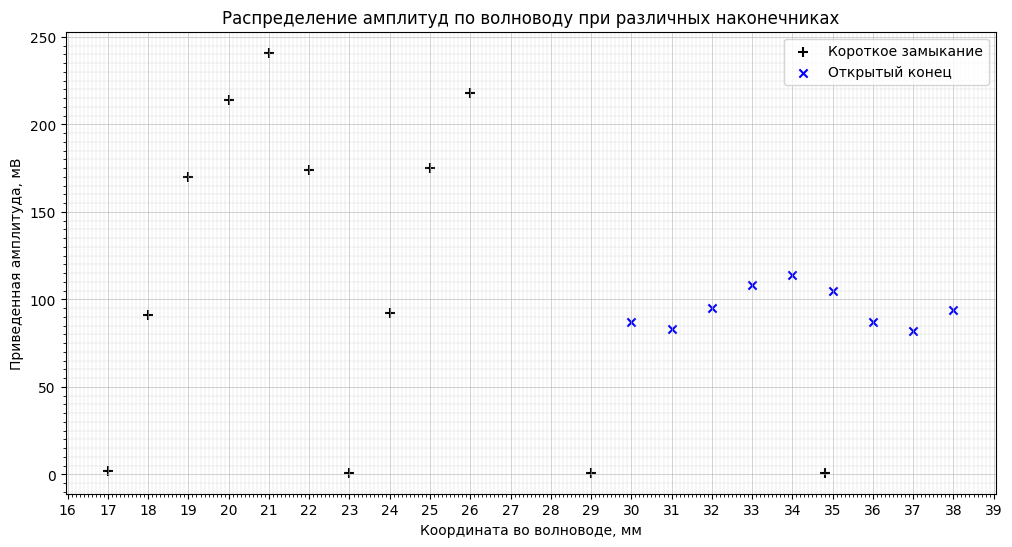

In [6]:
_, ax = polt.subplots(1, 1, figsize=(12, 6))

ax.scatter(np.array(list(experiment["tension_distribution"]["short_circuit"].keys())),
           np.array(list(experiment["tension_distribution"]["short_circuit"].values())),
           marker="+",
           s=45,
           label="Короткое замыкание",
           color="black")

ax.scatter(np.array(list(experiment["tension_distribution"]["open"].keys())),
           np.array(list(experiment["tension_distribution"]["open"].values())),
           marker="x",
           s=35,
           label="Открытый конец",
           color="blue")

ax.set_title("Распределение амплитуд по волноводу при различных наконечниках")
ax.set_ylabel("Приведенная амплитуда, мВ")
ax.set_xlabel("Координата во волноводе, мм")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

In [7]:
def MeanDiff(arr):
  """
  Считает среднюю разность соседних элементов по массиву

  Args:
      arr: произвольный массив

  Returns:
      средняя разность
  """
  return np.mean([arr[i + 1] - arr[i] for i in range(len(arr) - 1)])

In [8]:
console.print(Panel(Text(f"{(MeanDiff(experiment_tension_distribution_open_mins)):.5f} мм",
                         style="bold"),
                    title="Длина волны (открытый конец)"),
              justify="left")

console.print(Panel(Text(f"{(MeanDiff(experiment_tension_distribution_short_circuit_mins)):.5f} мм",
                         style="bold"),
                    title="Длина волны (короткое замыкание)"),
              justify="left")

╭─ Длина волны (открытый конец) ─╮                                                                                 
│ 6.00000 мм                     │                                                                                 
╰────────────────────────────────╯

╭─ Длина волны (короткое замыкание) ─╮                                                                             
│ 5.93333 мм                         │                                                                             
╰────────────────────────────────────╯

## Диаграмма направленностей с рупором

In [9]:
angles = np.array(list(experiment["radiation_pattern"]["megaphone"].keys()))
amplitudes = np.array(list(experiment["radiation_pattern"]["megaphone"].values()))

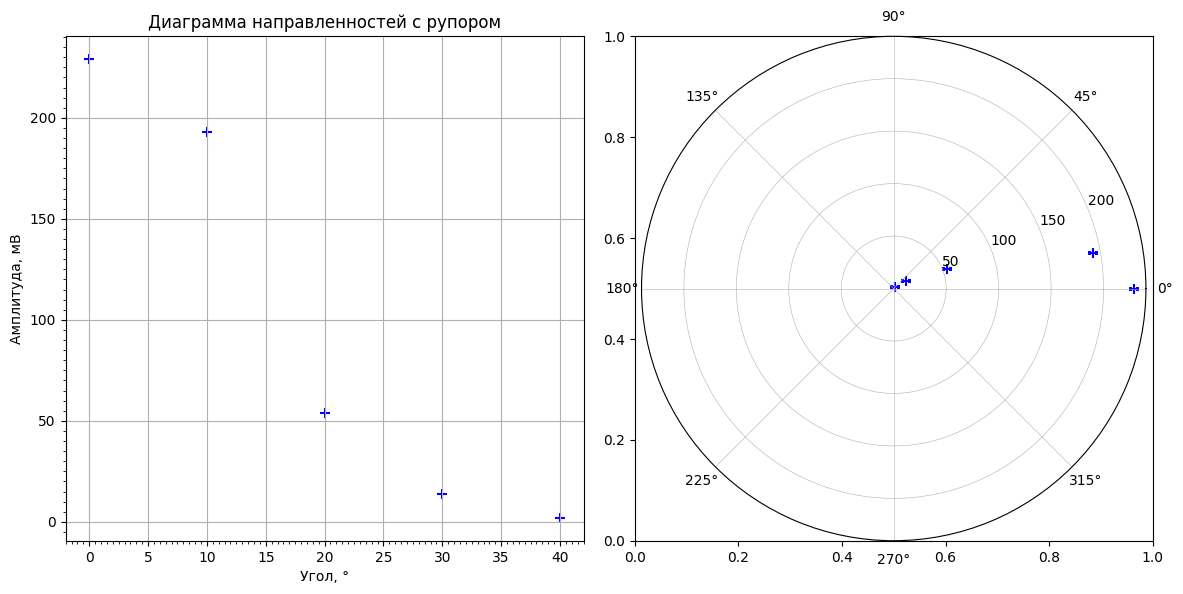

In [10]:
_, (ax, ax_2) = polt.subplots(1, 2, figsize=(12, 6))

ax.scatter(angles,
           amplitudes,
           marker="+",
           s=50,
           color="blue")

ax.set_title("Диаграмма направленностей с рупором")
ax.set_xlabel("Угол, °")
ax.set_ylabel("Амплитуда, мВ")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

ax.grid(True)

ax_2 = polt.subplot(1, 2, 2, projection='polar')
ax_2.scatter(np.deg2rad(angles),
             amplitudes,
             marker="+",
             s=50,
             color="blue")


polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.tight_layout()
polt.show()

# Поляризация направленных электромагнитных волн

$$ \Delta\varphi_{theor}=\frac{\lambda}{D},\ \ \ \ \Delta\varphi_{prac} = |\frac{\varphi_2 - \varphi_1}{2}|: \varphi_1 \ne \varphi_2,\ A(\varphi_1) = A(\varphi_2) = \frac{A_{max}}{\sqrt{2}}$$

### $$A_{max} = 0.868 В,\ \ \ \varphi_1 = 68^{\circ}, \varphi_2 = 104^{\circ} \Longrightarrow \Delta\varphi_{prac} = 18^{\circ}$$
### $$\lambda = 0.006м, D = 0.02м, \Longrightarrow \Delta\varphi_{theor} \approx 17.18^{\circ}$$

In [11]:
print(f"△φ = {np.rad2deg(0.006 / 0.02)}")

△φ = 17.188733853924695


Оценка минимального расстояния, на которых можно снимать диаграммы направленности
$$ r > \frac{2D^2}{\lambda} \approx 0.133 м $$

In [12]:
print((2 * (0.02)**2) / 0.006)

0.13333333333333333


Поляризация с решеткой

In [13]:
angles = np.array(list(experiment["polarization"]["gauze"].keys()))
intensities = np.array(list(experiment["polarization"]["gauze"].values()))

E_0 = 86.8
I_0 = E_0**2 / (2 * 4 * np.pi * 10 * 3)


def IMaluc(a):
  k = 0.98
  return k * I_0 * (1 - np.cos(a)**2)

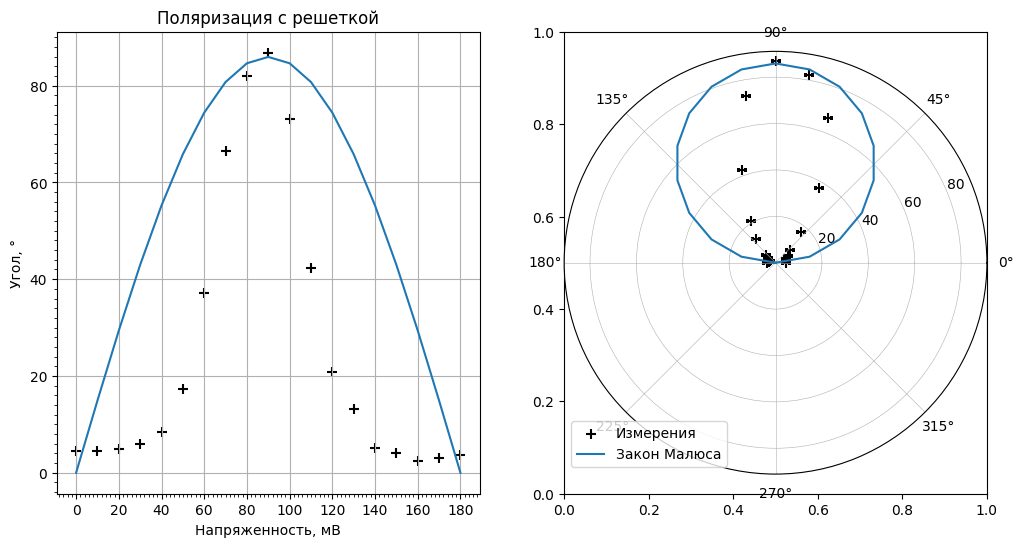

In [14]:
_, (ax, ax_2) = polt.subplots(1, 2, figsize=(12, 6))

ax.scatter(angles,
           intensities,
           label="Измерения",
           marker="+",
           s=45,
           color="black")

ax.plot(angles,
        np.sqrt(IMaluc(np.deg2rad(angles)) * 2 * 4 * np.pi * 10 * 3),
        label="Закон Малюса")


ax.set_title("Поляризация с решеткой")
ax.set_ylabel("Угол, °")
ax.set_xlabel("Напряженность, мВ")

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

ax.grid(True)

ax_2 = polt.subplot(1, 2, 2, projection='polar')
ax_2.scatter(angles / 180 * np.pi,
             intensities,
             label="Измерения",
             marker="+",
             s=45,
             color="black")

ax_2.plot(angles / 180 * np.pi,
          np.sqrt(IMaluc(np.deg2rad(angles))
                  * 2 * 4 * np.pi * 10 * 3), label="Закон Малюса")

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

## Полное внутреннее отражение

In [15]:
l = np.array(list(experiment["total_internal_reflection"]["prism"].keys()))
amplitudes = np.array(list(experiment["total_internal_reflection"]["prism"].values()))

theta = 45 * np.pi / 180
n_glass = 3 / 2
lamda = 6
a = 2 * np.pi / lamda * np.sqrt(n_glass**2 * np.sin(theta)**2 - 1)

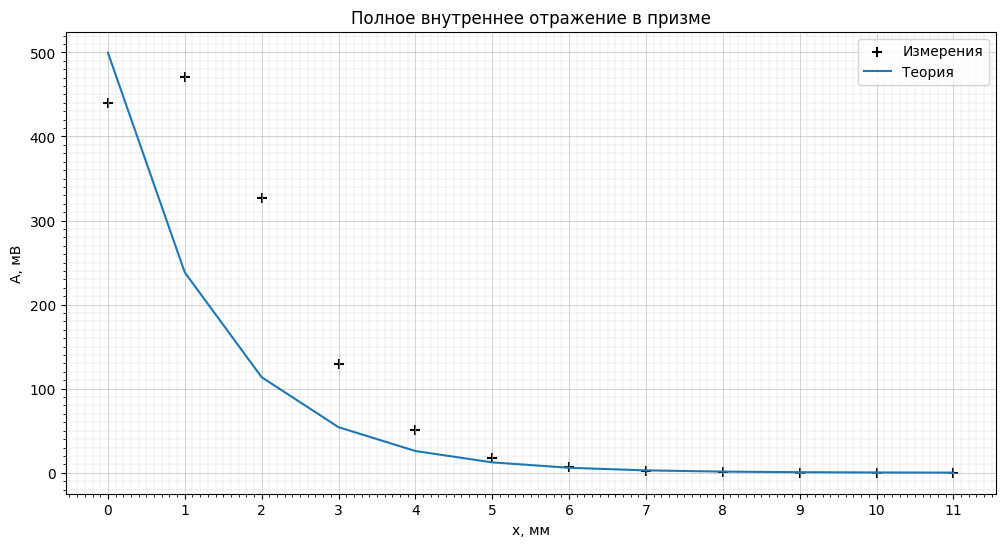

In [16]:
_, ax = polt.subplots(1, 1, figsize=(12, 6))

ax.scatter(l,
           (amplitudes * 1000)**2 / (2 * 4 * np.pi * 10 * 3) / 10000,
           label="Измерения",
           marker="+",
           s=45,
           color="black")

ax.plot(l,
        I_0 * np.exp(-2 * a * l) * 500000 / 10000,
        label="Теория")

ax.set_title("Полное внутреннее отражение в призме")
ax.set_xlabel("x, мм")
ax.set_ylabel("A, мВ")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

## Интерферометр Майкельсона

In [17]:
interferometer_data = list(experiment["wavelength"]["Michelson_interferometer"].values())
num_measurements = len(interferometer_data)
num_differences = num_measurements - 2

wavelength_differences = [interferometer_data[i + 2] -
                          interferometer_data[i] for i in range(num_differences)]
mean_wavelength_difference = np.sum(wavelength_differences) / num_differences

table = Table(title="Анализ данных интерферометра Майкельсона",
              show_header=True, header_style="bold")

table.add_column("Итерация", style="dim", width=8)
table.add_column("Разность длин волн (λ)", justify="left")

for i, diff in enumerate(wavelength_differences):
  table.add_row(str(i + 1), f"{diff:.2f}")

table.add_row("-----", "-----")

table.add_row("[bold]Ср. знач.[/]", f"[bold]{mean_wavelength_difference:.2f}[/]")

console.print(table)
# console.print(f"Всего измерений: {num_measurements}")
# console.print(f"Количество рассчитанных разностей: {num_differences}")

    Анализ данных интерферометра     
             Майкельсона             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Итерация ┃ Разность длин волн (λ) ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 1        │ 10.30                  │
│ 2        │ 10.50                  │
│ 3        │ 10.70                  │
│ 4        │ 10.50                  │
│ -----    │ -----                  │
│ Ср.      │ 10.50                  │
│ знач.    │                        │
└──────────┴────────────────────────┘